### A Comprehensive Guide to PyTorch Datasets: CIFAR

### @ 1. Fundamental Concepts of CIFAR Datasets

In [ ]:
'''
The CIFAR - 10 dataset consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class
The 10 classes are: airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks. 
The dataset is divided into 50,000 training images and 10,000 test images
'''

In [ ]:
'''
The CIFAR - 100 dataset is similar to CIFAR - 10 but has 100 different classes. 
Each class contains 600 images, with 500 for training and 100 for testing
The 100 classes are grouped into 20 super - classes
'''

In [9]:
# -*- coding: utf-8 -*-
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [10]:
# GPU
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('GPU state:', device)

GPU state: cpu


### --> Use torchvision transforms module to convert our image data

In [11]:
# Cifar-10 data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

### --> Since PyTorch's datasets has CIFAR-10 data, it can be downloaded here

In [12]:
# Data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
testLoader = torch.utils.data.DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

### --> 10 categories in CIFAR-10.

In [13]:
# Data classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### --> Visualizing the Data

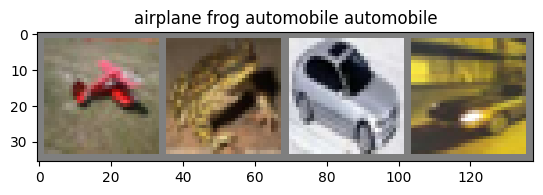

In [17]:
import matplotlib.pyplot as plt
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=4, 
                                          shuffle=True)
images, labels = next(iter(trainloader))
plt.imshow(torchvision.utils.make_grid(images).permute(1, 2, 0) / 2 + 0.5); 
plt.title(' '.join(trainset.classes[label] for label in labels)); plt.show()

### --> The structure of the model

In [14]:
# Model structure
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().to(device)
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### --> These are parameter settings

In [16]:
'''These are parameter settings. They are loss function (using CrossEntropy of multi-classifiers), 
learning rate, number of iterations (epochs), and optimizer'''

# Parameters
criterion = nn.CrossEntropyLoss()
lr = 0.001
epochs = 3
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

# Train
for epoch in range(epochs):
    running_loss = 0.0

    for times, data in enumerate(trainLoader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        if times % 100 == 99 or times+1 == len(trainLoader):
            print('[%d/%d, %d/%d] loss: %.3f' % (epoch+1, epochs, times+1, len(trainLoader), running_loss/2000))

print('Finished Training')

[1/3, 100/6250] loss: 0.115
[1/3, 200/6250] loss: 0.230
[1/3, 300/6250] loss: 0.345
[1/3, 400/6250] loss: 0.460
[1/3, 500/6250] loss: 0.575
[1/3, 600/6250] loss: 0.690
[1/3, 700/6250] loss: 0.804
[1/3, 800/6250] loss: 0.918
[1/3, 900/6250] loss: 1.030
[1/3, 1000/6250] loss: 1.140
[1/3, 1100/6250] loss: 1.248
[1/3, 1200/6250] loss: 1.351
[1/3, 1300/6250] loss: 1.452
[1/3, 1400/6250] loss: 1.552
[1/3, 1500/6250] loss: 1.649
[1/3, 1600/6250] loss: 1.744
[1/3, 1700/6250] loss: 1.842
[1/3, 1800/6250] loss: 1.936
[1/3, 1900/6250] loss: 2.029
[1/3, 2000/6250] loss: 2.121
[1/3, 2100/6250] loss: 2.214
[1/3, 2200/6250] loss: 2.302
[1/3, 2300/6250] loss: 2.394
[1/3, 2400/6250] loss: 2.483
[1/3, 2500/6250] loss: 2.571
[1/3, 2600/6250] loss: 2.658
[1/3, 2700/6250] loss: 2.745
[1/3, 2800/6250] loss: 2.834
[1/3, 2900/6250] loss: 2.922
[1/3, 3000/6250] loss: 3.010
[1/3, 3100/6250] loss: 3.097
[1/3, 3200/6250] loss: 3.183
[1/3, 3300/6250] loss: 3.269
[1/3, 3400/6250] loss: 3.351
[1/3, 3500/6250] loss: 

### --> Evaluate model

In [18]:
# Test
correct = 0
total = 0
with torch.no_grad():
    for data in testLoader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test inputs: %d %%' % (100 * correct / total))

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testLoader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(8):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of the network on the 10000 test inputs: 56 %
Accuracy of plane : 65 %
Accuracy of   car : 51 %
Accuracy of  bird : 36 %
Accuracy of   cat : 30 %
Accuracy of  deer : 73 %
Accuracy of   dog : 44 %
Accuracy of  frog : 57 %
Accuracy of horse : 62 %
Accuracy of  ship : 76 %
Accuracy of truck : 71 %


### >> Data Augmentation

In [ ]:
'''To improve the generalization ability of the model, we can use data augmentation techniques'''
transform = transforms.Compose(
    [transforms.RandomCrop(32, padding=4),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
# Define a function to plot a grid of images
def plot_images(images, labels, class_names, grid_size=(4, 4)):
    plt.figure(figsize=(8, 8))
    for i in range(grid_size[0] * grid_size[1]):
        plt.subplot(grid_size[0], grid_size[1], i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i][0]])
    plt.show()


### >> Using a More Sophisticated Model

In [ ]:
'''Instead of a simple convolutional neural network, we can use pre - trained models
 like ResNet and fine - tune them on the CIFAR dataset'''
import torchvision.models as models
resnet = models.resnet18(pretrained=True)
# Modify the last fully - connected layer for CIFAR - 10 (10 classes)
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, 10)